In [20]:
import pandas as pd # to use or generate dataframe
import seaborn as sns # for pretty plots
import numpy as np # for matrix manipulation
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import sklearn.cluster as skc

In [22]:
pwd

'C:\\Users\\emper\\OneDrive\\Desktop\\DSTI\\Pratical-Intro-to-Data-Science\\Final-Project'

In [24]:
%cd C:\\Users\\emper\\OneDrive\\Desktop\\DSTI\\Pratical-Intro-to-Data-Science\\Final-Project

C:\Users\emper\OneDrive\Desktop\DSTI\Pratical-Intro-to-Data-Science\Final-Project


In [26]:
weather_station = pd.read_csv("WS_Master_Data_with_Long_and_Lat_P.csv")

In [28]:
weather_station.head(100)

,year,month,tmax,tmin,af,rain,sun,station,lon,lat,Sun_Data_Source
0,1941,Jan,NaN,NaN,NaN,74.7,NaN,aberporth,-4.57,52.14,Missing
1,1941,Feb,NaN,NaN,NaN,69.1,NaN,aberporth,-4.57,52.14,Missing
2,1941,Mar,NaN,NaN,NaN,76.2,NaN,aberporth,-4.57,52.14,Missing
3,1941,Apr,NaN,NaN,NaN,33.7,NaN,aberporth,-4.57,52.14,Missing
4,1941,May,NaN,NaN,NaN,51.3,NaN,aberporth,-4.57,52.14,Missing
...,...,...,...,...,...,...,...,...,...,...,...
95,1948,Dec,8.5,4.2,NaN,175.9,87.2,aberporth,-4.57,52.14,Campbell Stokes
96,1949,Jan,8.6,5.0,NaN,44.0,60,aberporth,-4.57,52.14,Campbell Stokes
97,1949,Feb,8.7,4.4,NaN,36.6,105,aberporth,-4.57,52.14,Campbell Stokes
98,1949,Mar,8.7,3.3,NaN,44.4,158.8,aberporth,-4.57,52.14,Campbell Stokes


In [64]:
weather_station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39183 entries, 0 to 39182
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             39183 non-null  int64  
 1   month            39183 non-null  object 
 2   tmax             38257 non-null  float64
 3   tmin             38283 non-null  float64
 4   af               36858 non-null  float64
 5   rain             38312 non-null  float64
 6   sun              30145 non-null  object 
 7   station          39183 non-null  object 
 8   lon              39183 non-null  float64
 9   lat              39183 non-null  float64
 10  Sun_Data_Source  39183 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 3.3+ MB


**Let's convert the sun column from object to float64**

In [77]:
weather_station['sun'] = pd.to_numeric(weather_station['sun'], errors = 'coerce')

In [79]:
weather_station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39183 entries, 0 to 39182
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             39183 non-null  int64  
 1   month            39183 non-null  object 
 2   tmax             38257 non-null  float64
 3   tmin             38283 non-null  float64
 4   af               36858 non-null  float64
 5   rain             38312 non-null  float64
 6   sun              29863 non-null  float64
 7   station          39183 non-null  object 
 8   lon              39183 non-null  float64
 9   lat              39183 non-null  float64
 10  Sun_Data_Source  39183 non-null  object 
dtypes: float64(7), int64(1), object(3)
memory usage: 3.3+ MB


**Let's group the data by station to ensure clusturing by stations and not by observations/records**

In [81]:
groupby_station = weather_station.groupby('station')
groupby_station

**Get only the numerical Columns**

In [102]:
numeric_cols = weather_station.select_dtypes(include='number').columns
numeric_cols

Index(['year', 'tmax', 'tmin', 'af', 'rain', 'sun', 'lon', 'lat'], dtype='object')

In [104]:
groupby_station_df = groupby_station[numeric_cols].mean().reset_index()
groupby_station_df.head(5)

,station,year,tmax,tmin,af,rain,sun,lon,lat
0,aberporth,1982.000000,12.501738,7.269919,1.492537,76.175000,128.641955,-4.57,52.140
1,armagh,1938.000000,12.979003,5.695801,3.275591,68.913213,104.269217,-6.64,54.352
2,ballypatrick,1992.225634,11.438408,5.595798,2.582712,110.185442,106.663636,-6.15,55.181
3,bradford,1965.500000,12.347289,5.756471,3.728850,72.988864,104.586547,-1.77,53.813
4,braemar,1991.000000,10.586082,2.793170,8.626289,75.877158,98.446739,-3.39,57.011


**Alternatively, this helps to focus on only the required columns**

In [107]:
key_columns= ["tmax", "tmin", "af", "rain", "sun"]
key_columns

['tmax', 'tmin', 'af', 'rain', 'sun']

In [109]:
groupby_station[key_columns]

In [111]:
groupby_station_df = groupby_station[key_columns].mean().reset_index()
groupby_station_df.head(5)

,station,tmax,tmin,af,rain,sun
0,aberporth,12.501738,7.269919,1.492537,76.175000,128.641955
1,armagh,12.979003,5.695801,3.275591,68.913213,104.269217
2,ballypatrick,11.438408,5.595798,2.582712,110.185442,106.663636
3,bradford,12.347289,5.756471,3.728850,72.988864,104.586547
4,braemar,10.586082,2.793170,8.626289,75.877158,98.446739


In [113]:
groupby_station_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   station  37 non-null     object 
 1   tmax     37 non-null     float64
 2   tmin     37 non-null     float64
 3   af       37 non-null     float64
 4   rain     37 non-null     float64
 5   sun      37 non-null     float64
dtypes: float64(5), object(1)
memory usage: 1.9+ KB


**Now, let's drop all the missing values**

Dropping the missing value was as a purposive sampling techniques which ensure only rows with complete values are selected

In [203]:
k_means_data = groupby_station_df.dropna()
k_means_data.head(5)

,station,tmax,tmin,af,rain,sun
0,aberporth,12.501738,7.269919,1.492537,76.175000,128.641955
1,armagh,12.979003,5.695801,3.275591,68.913213,104.269217
2,ballypatrick,11.438408,5.595798,2.582712,110.185442,106.663636
3,bradford,12.347289,5.756471,3.728850,72.988864,104.586547
4,braemar,10.586082,2.793170,8.626289,75.877158,98.446739


In [205]:
k_means_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   station  37 non-null     object 
 1   tmax     37 non-null     float64
 2   tmin     37 non-null     float64
 3   af       37 non-null     float64
 4   rain     37 non-null     float64
 5   sun      37 non-null     float64
dtypes: float64(5), object(1)
memory usage: 1.9+ KB


**Let's drop the station and focus only on the numerical data**

In [207]:
key_columns= ["tmax", "tmin", "af", "rain", "sun"]
key_columns

['tmax', 'tmin', 'af', 'rain', 'sun']

In [209]:
k_means_data = k_means_data[key_columns]
k_means_data

,tmax,tmin,af,rain,sun
0,12.501738,7.269919,1.492537,76.175000,128.641955
1,12.979003,5.695801,3.275591,68.913213,104.269217
2,11.438408,5.595798,2.582712,110.185442,106.663636
3,12.347289,5.756471,3.728850,72.988864,104.586547
4,10.586082,2.793170,8.626289,75.877158,98.446739
5,13.521507,8.451838,0.733456,90.062316,134.119367
6,14.377179,6.258205,3.557692,46.398413,125.000000
7,14.750000,7.117086,2.919065,98.087590,123.556054
8,14.621257,7.932528,1.703620,75.065769,138.594142
9,11.642314,4.886000,5.113523,149.432712,97.186254


**Let's standardise/normalise the dataset**

The ensures integration and consistency for effective data analysis

In [213]:
scaler = StandardScaler()

In [215]:
k_means_data = scaler.fit_transform(k_means_data)
k_means_data

array([[-0.28771425,  1.02418434, -1.26413314,  0.03057775,  0.58860283],
       [ 0.07195725, -0.31352893, -0.12006369, -0.24859811, -0.95250804],
       [-1.08905133, -0.39851256, -0.56463862,  1.33809261, -0.80110669],
       [-0.40410921, -0.26196972,  0.17076366, -0.09191168, -0.93244299],
       [-1.73137276, -2.78023524,  3.31313174,  0.01912736, -1.32066873],
       [ 0.48079457,  2.02860032, -1.75118639,  0.56446886,  0.93494466],
       [ 1.12563817,  0.16441238,  0.06094268, -1.11416864,  0.35831862],
       [ 1.40659966,  0.89430471, -0.34882314,  0.8729966 ,  0.26701656],
       [ 1.30957752,  1.58728126, -1.12869515, -0.01206608,  1.21788887],
       [-0.93538522, -1.00171164,  1.05921788,  2.8469348 , -1.40037036],
       [-0.32181679,  0.22361384, -0.68964431,  2.49090271, -1.17178518],
       [-0.3376358 , -0.98961736,  0.81993169, -0.79812843, -0.49817   ],
       [ 0.84332404,  1.99184699, -1.31692745, -0.34544901,  2.25812432],
       [-1.43496906, -2.20370132,  2.3

**Let's transform the k_means data into a dataframe**

In [218]:
# Assuming the scaled array is k_means_data
# and you want to use the same column names as the original DataFrame
scaled_k_means_data = pd.DataFrame(k_means_data, columns=key_columns)
scaled_k_means_data

,tmax,tmin,af,rain,sun
0,-0.287714,1.024184,-1.264133,0.030578,0.588603
1,0.071957,-0.313529,-0.120064,-0.248598,-0.952508
2,-1.089051,-0.398513,-0.564639,1.338093,-0.801107
3,-0.404109,-0.261970,0.170764,-0.091912,-0.932443
4,-1.731373,-2.780235,3.313132,0.019127,-1.320669
5,0.480795,2.028600,-1.751186,0.564469,0.934945
6,1.125638,0.164412,0.060943,-1.114169,0.358319
7,1.406600,0.894305,-0.348823,0.872997,0.267017
8,1.309578,1.587281,-1.128695,-0.012066,1.217889
9,-0.935385,-1.001712,1.059218,2.846935,-1.400370


In [220]:
scaled_k_means_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tmax    37 non-null     float64
 1   tmin    37 non-null     float64
 2   af      37 non-null     float64
 3   rain    37 non-null     float64
 4   sun     37 non-null     float64
dtypes: float64(5)
memory usage: 1.6 KB


**Let's drop the missing values again**

Dropping the missing value was as a purposive sampling techniques which ensure only raws with complete values are selected

In [224]:
scaled_k_means_data = scaled_k_means_data.dropna()
scaled_k_means_data

,tmax,tmin,af,rain,sun
0,-0.287714,1.024184,-1.264133,0.030578,0.588603
1,0.071957,-0.313529,-0.120064,-0.248598,-0.952508
2,-1.089051,-0.398513,-0.564639,1.338093,-0.801107
3,-0.404109,-0.261970,0.170764,-0.091912,-0.932443
4,-1.731373,-2.780235,3.313132,0.019127,-1.320669
5,0.480795,2.028600,-1.751186,0.564469,0.934945
6,1.125638,0.164412,0.060943,-1.114169,0.358319
7,1.406600,0.894305,-0.348823,0.872997,0.267017
8,1.309578,1.587281,-1.128695,-0.012066,1.217889
9,-0.935385,-1.001712,1.059218,2.846935,-1.400370


**Let's add another column for avaerage temparature**

In [227]:
scaled_k_means_data['AvgTemp'] = (scaled_k_means_data['tmax'] + scaled_k_means_data['tmin'])/2

Using average values for temperature helps to reduce the influence of extreme values in tmax and tmin

In [230]:
scaled_k_means_data

,tmax,tmin,af,rain,sun,AvgTemp
0,-0.287714,1.024184,-1.264133,0.030578,0.588603,0.368235
1,0.071957,-0.313529,-0.120064,-0.248598,-0.952508,-0.120786
2,-1.089051,-0.398513,-0.564639,1.338093,-0.801107,-0.743782
3,-0.404109,-0.261970,0.170764,-0.091912,-0.932443,-0.333039
4,-1.731373,-2.780235,3.313132,0.019127,-1.320669,-2.255804
5,0.480795,2.028600,-1.751186,0.564469,0.934945,1.254697
6,1.125638,0.164412,0.060943,-1.114169,0.358319,0.645025
7,1.406600,0.894305,-0.348823,0.872997,0.267017,1.150452
8,1.309578,1.587281,-1.128695,-0.012066,1.217889,1.448429
9,-0.935385,-1.001712,1.059218,2.846935,-1.400370,-0.968548


Let's do simple EDA**

In [233]:
scaled_k_means_data.describe()

,tmax,tmin,af,rain,sun,AvgTemp
count,3.700000e+01,3.700000e+01,3.700000e+01,3.700000e+01,3.700000e+01,3.700000e+01
mean,3.720747e-16,3.488201e-17,-6.301266e-17,8.491706e-16,-8.881784e-16,1.920386e-16
std,1.013794e+00,1.013794e+00,1.013794e+00,1.013794e+00,1.013794e+00,9.202253e-01
min,-2.537847e+00,-2.780235e+00,-1.751186e+00,-1.114169e+00,-1.907070e+00,-2.255804e+00
25%,-4.882479e-01,-5.830856e-01,-5.646386e-01,-7.868309e-01,-8.101484e-01,-6.636266e-01
50%,7.195725e-02,9.008830e-02,-1.200637e-01,-2.878210e-01,-8.098500e-02,1.009309e-01
75%,8.322103e-01,6.174594e-01,5.583208e-01,5.644689e-01,6.097874e-01,6.450253e-01
max,1.596324e+00,2.028600e+00,3.313132e+00,2.846935e+00,2.258124e+00,1.448429e+00


In [235]:
key_columns= ["tmax", "tmin", "af", "rain", "sun", "AvgTemp"]
key_columns

['tmax', 'tmin', 'af', 'rain', 'sun', 'AvgTemp']

<Axes: >

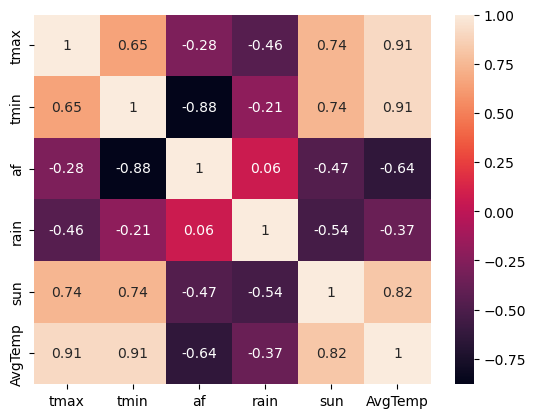

In [237]:
#Let's use Scatter Plot Heatmap to see the correlation index between the variables
correlation = scaled_k_means_data[key_columns].corr().round(2)
sns.heatmap(correlation, annot = True)

There is a strong positive correlation between AvgTemp and sunshine and strong negative temperature between AvgTemp and af. This gives a pointer to the variables selection for the 2D plot to show the classification

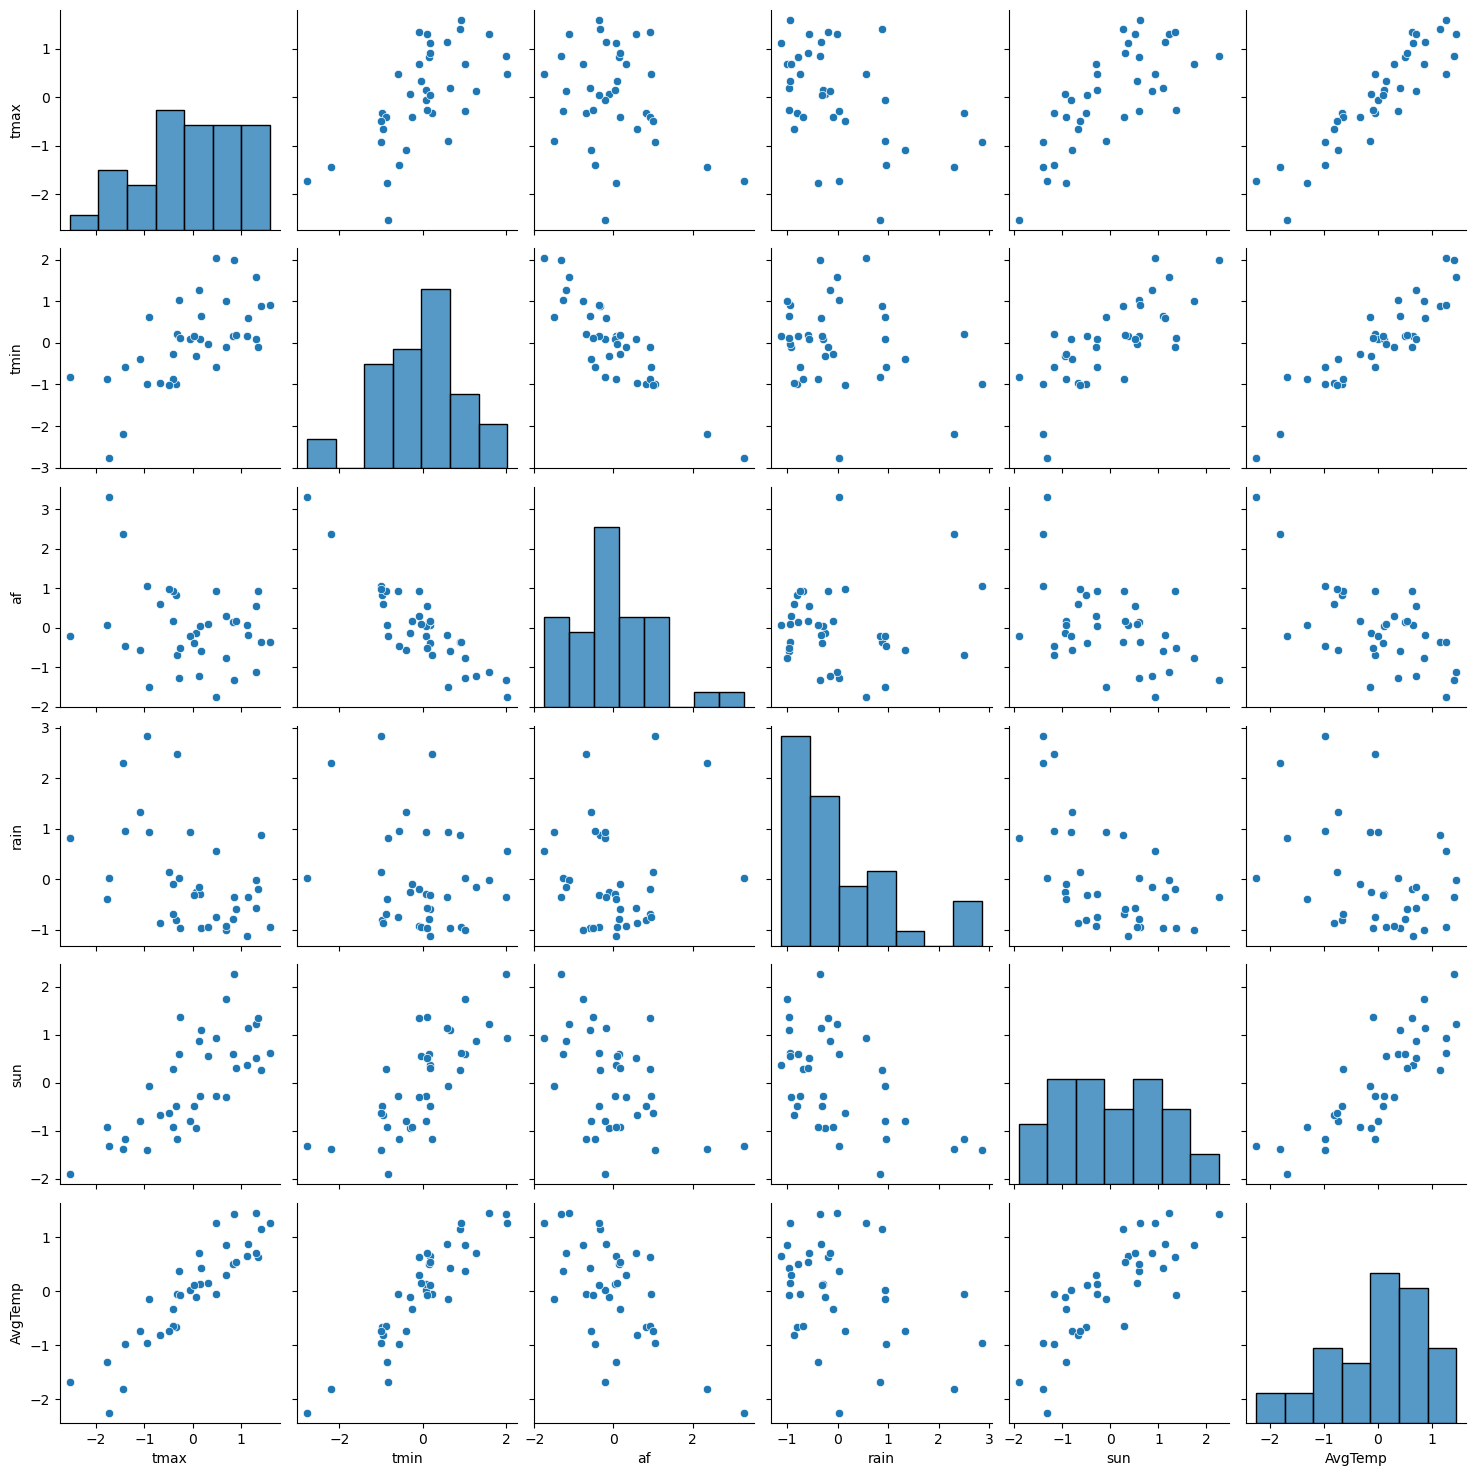

In [240]:
sns.pairplot(scaled_k_means_data[key_columns])

**Now, let's create the elbow graph to determine the value of k**

Since there are no predefined labels, elbow graph provides an oblective way to select our k value. 

In [244]:
from sklearn.cluster import KMeans

C:\Users\emper\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\emper\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\emper\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\emper\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

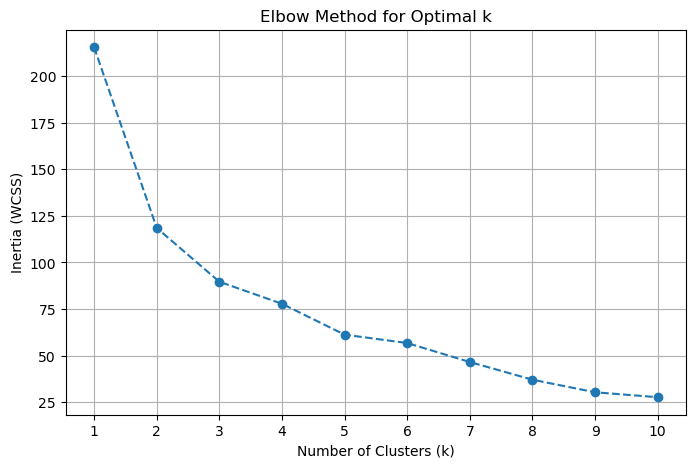

In [246]:
# Range of k values to test
k_range = range(1, 11)

# Store the inertia (sum of squared distances to closest cluster center)
inertias = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_k_means_data)
    inertias.append(kmeans.inertia_)

# Plot the elbow chart
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_range)
plt.grid(True)
plt.show()

Since the elbow start at 2, let's take k = 2

**Let's try to use tmax and sun for the scatter plot to display the clusters**

C:\Users\emper\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


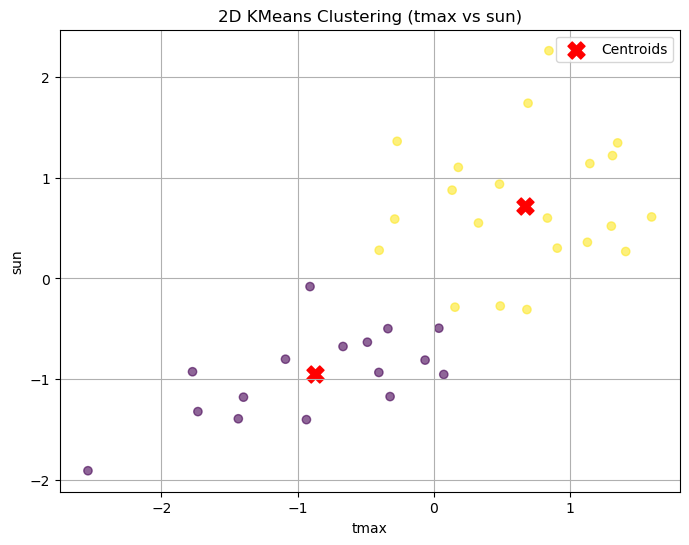

In [250]:
# Choose 2 features
X_2d = scaled_k_means_data[['tmax', 'sun']]

# Fit KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X_2d)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X_2d['tmax'], X_2d['sun'], c=labels, cmap='viridis', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=150, c='red', marker='X', label='Centroids')
plt.xlabel('tmax')
plt.ylabel('sun')
plt.title('2D KMeans Clustering (tmax vs sun)')
plt.legend()
plt.grid(True)
plt.show()


**Let's try tmin and sun because both are less correlated**

C:\Users\emper\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


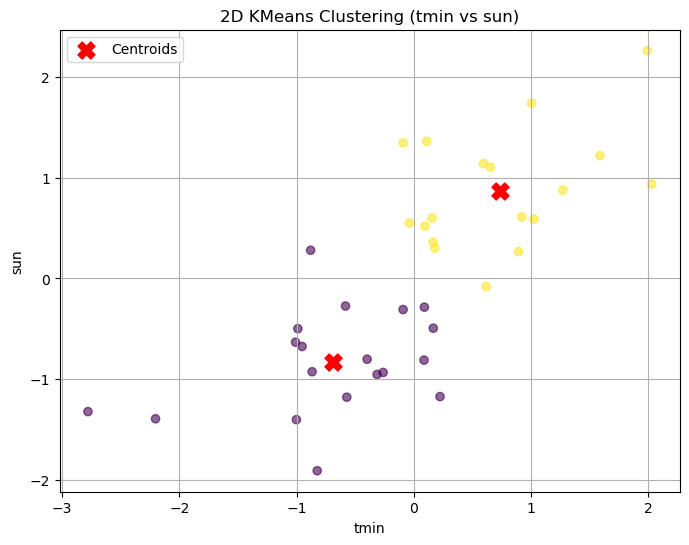

In [253]:
# Choose 2 features
X_2d = scaled_k_means_data[['tmin', 'sun']]

# Fit KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X_2d)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X_2d['tmin'], X_2d['sun'], c=labels, cmap='viridis', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=150, c='red', marker='X', label='Centroids')
plt.xlabel('tmin')
plt.ylabel('sun')
plt.title('2D KMeans Clustering (tmin vs sun)')
plt.legend()
plt.grid(True)
plt.show()


**Let's try AvgTemp and sun**

C:\Users\emper\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


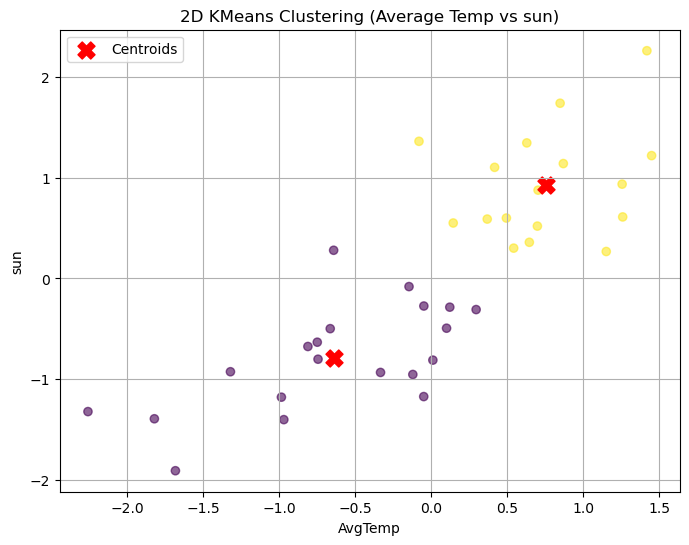

In [256]:
# Choose 2 features
X_2d = scaled_k_means_data[['AvgTemp', 'sun']]

# Fit KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X_2d)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X_2d['AvgTemp'], X_2d['sun'], c=labels, cmap='viridis', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=150, c='red', marker='X', label='Centroids')
plt.xlabel('AvgTemp')
plt.ylabel('sun')
plt.title('2D KMeans Clustering (Average Temp vs sun)')
plt.legend()
plt.grid(True)
plt.show()


As shown in the figure above, the data points are clustered into two. The purple data points represents the cold weather station (with low average temperature and sunshine hours) while the yellow data points represent the hot data points (with high average temperature and sunshine hours)

**Let's assess the performance of the algorithm**

**Let's plot the cluster Count**

In [261]:
from sklearn.metrics import silhouette_score

# labels are your KMeans cluster labels
unique_labels, counts = np.unique(labels, return_counts=True)

unique_labels, counts

(array([0, 1]), array([20, 17], dtype=int64))

C:\Users\emper\AppData\Local\Temp\ipykernel_6164\826244185.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique_labels, y=counts, palette='viridis')


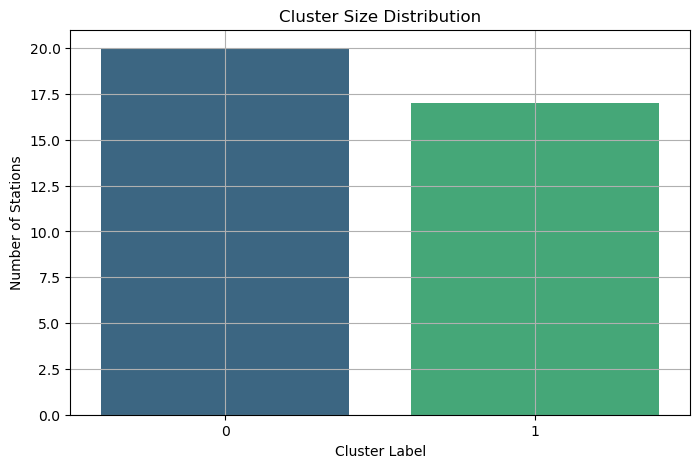

In [263]:
# Plot bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=unique_labels, y=counts, palette='viridis')
plt.xlabel('Cluster Label')
plt.ylabel('Number of Stations')
plt.title('Cluster Size Distribution')
plt.grid(True)
plt.show()

**Let's plot Silhouette_score**

In [266]:
# Evaluate clustering quality
silhouette = silhouette_score(X_2d, labels)
print(f"Silhouette Score: {silhouette:.2f}")


Silhouette Score: 0.55


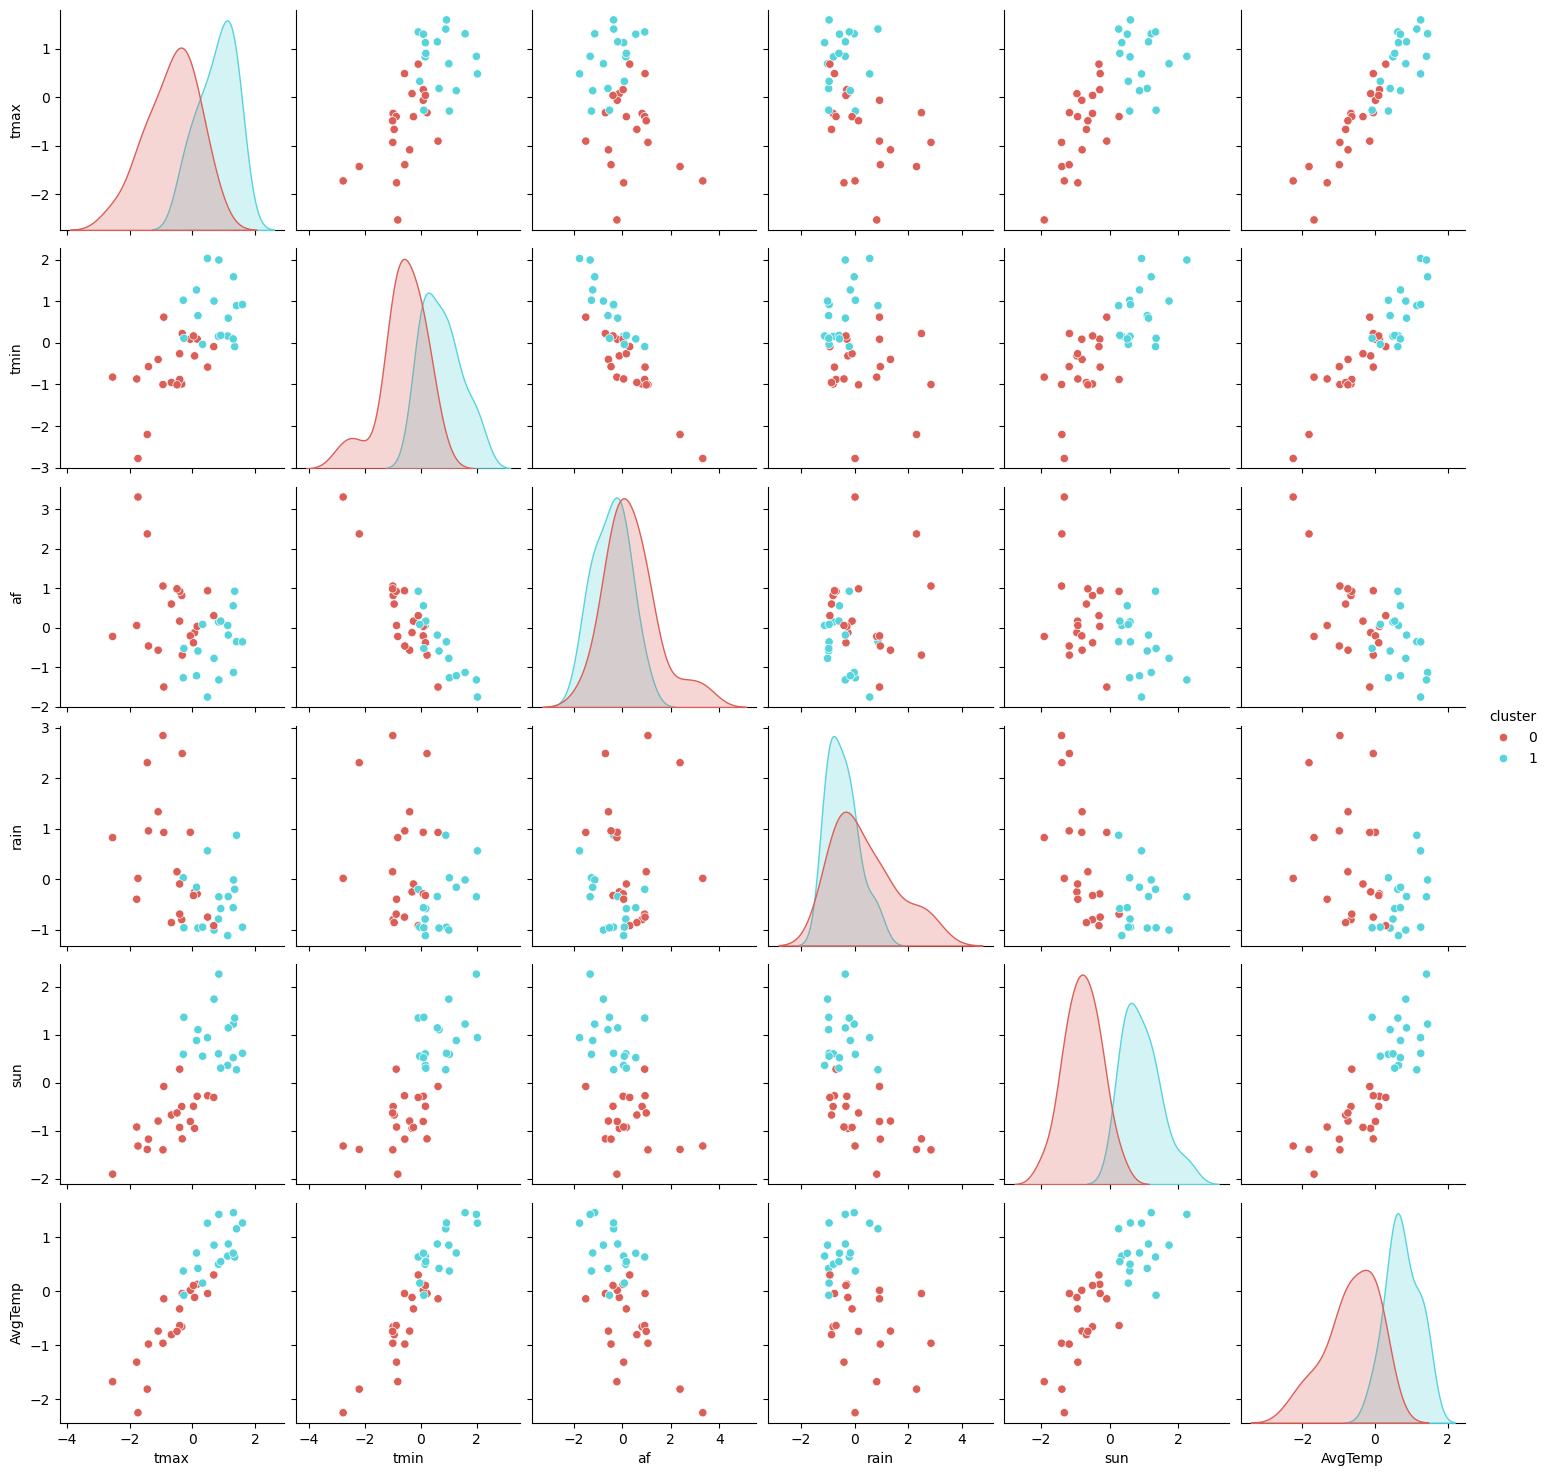

In [268]:
# Add KMeans cluster labels as a new column for hue
scaled_k_means_data['cluster'] = labels  # replace 'labels' with your actual label variable

# Optional: Create a nice color palette
palette = sns.color_palette("hls", len(scaled_k_means_data['cluster'].unique()))

# Create the pairplot
sns.pairplot(scaled_k_means_data, hue='cluster', palette=palette, diag_kind='kde')

# Show plot
plt.show()

In [728]:
#plt.scatter(MyRes2.iloc[:,0],MyRes2.iloc[:,1], c=MyRes2.iloc[:,2])